## 1. 필요한 패키지 로드

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier

import glob

from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
import random

## 2. 파일 불러오기

In [2]:
path = 'C:/Users/user/Desktop/16017005/Leisure'

In [3]:
import os
os.listdir(path)

['.ipynb_checkpoints',
 'LeisuresurveyEDA.ipynb',
 'Leisure_F.ipynb',
 'nlas2020_revised.csv']

In [4]:
data = pd.read_csv(path+'/nlas2020_revised.csv',engine='python')
#http://stat.mcst.go.kr/mcst/WebPortal/public/main/main.html 다운로드 주소

In [5]:
data

,ID,"문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 1. 전시회 관람(미술, 사진, 건축, 디자인 등)",문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 2. 박물관 관람,"문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 3. 음악연주회 관람(클래식, 오페라 등)","문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 4. 전통예술공연 관람(국악, 민속놀이 등)",문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 5. 연극공연 관람(뮤지컬 포함),문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 6. 무용공연 관람,문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 7. 영화관람,"문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 8. 연예공연 관람(쇼, 콘서트, 마술 쇼 등)",문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 99. 보기 중 경험한 활동 없음,...,동거 가구원수,혼인상태,가구주 여부,종사자 지위,가구 소득,지역규모,권역,지역(시도),지역(시군구),장애여부
0,2,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2.0,2,6,2,3,3,11,33350,3
1,4,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2.0,1,8,2,3,3,11,33350,1
2,5,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2.0,1,5,2,3,3,11,33350,3
3,6,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2.0,2,8,2,3,3,11,33350,3
4,13,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,2.0,1,8,1,3,3,11,33350,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10083,15001,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,...,3,1.0,2,1,7,2,4,14,36020,3
10084,15002,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,...,3,1.0,2,8,6,2,4,14,36020,3
10085,15007,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,...,3,1.0,2,8,7,2,4,14,36020,3
10086,15009,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,...,3,1.0,2,8,6,2,4,14,36020,3


## 3. EDA

### 1. 연령 20~30대만 추출

In [6]:
data1=data[data['연령'].isin([2,3])]

In [7]:
data1

,ID,"문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 1. 전시회 관람(미술, 사진, 건축, 디자인 등)",문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 2. 박물관 관람,"문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 3. 음악연주회 관람(클래식, 오페라 등)","문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 4. 전통예술공연 관람(국악, 민속놀이 등)",문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 5. 연극공연 관람(뮤지컬 포함),문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 6. 무용공연 관람,문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 7. 영화관람,"문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 8. 연예공연 관람(쇼, 콘서트, 마술 쇼 등)",문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 99. 보기 중 경험한 활동 없음,...,동거 가구원수,혼인상태,가구주 여부,종사자 지위,가구 소득,지역규모,권역,지역(시도),지역(시군구),장애여부
73,206,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,1.0,2,8,2,3,6,16,38070,3
79,219,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,1.0,2,2,2,1,6,2,21150,1
89,259,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,2.0,2,8,3,3,3,12,34380,3
90,260,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2.0,2,2,4,3,3,12,34380,3
149,405,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2.0,1,8,2,2,6,16,38030,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10078,10127,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,...,1,1.0,1,1,3,1,1,1,11080,3
10079,10129,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,...,3,1.0,2,1,7,1,1,1,11080,3
10082,10144,NaN,NaN,NaN,NaN,NaN,NaN,7.0,8.0,NaN,...,1,1.0,1,8,1,3,3,11,33043,3
10083,15001,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,...,3,1.0,2,1,7,2,4,14,36020,3


### 2. 지난 1년간 1번 이상 참여한 여가활동 자료 처리

In [8]:
data2 = data1.iloc[:, 1:97]
data2

,"문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 1. 전시회 관람(미술, 사진, 건축, 디자인 등)",문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 2. 박물관 관람,"문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 3. 음악연주회 관람(클래식, 오페라 등)","문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 4. 전통예술공연 관람(국악, 민속놀이 등)",문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 5. 연극공연 관람(뮤지컬 포함),문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 6. 무용공연 관람,문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 7. 영화관람,"문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 8. 연예공연 관람(쇼, 콘서트, 마술 쇼 등)",문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 99. 보기 중 경험한 활동 없음,문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 9. 문학행사참여,...,문1.한 번 이상 참여한 여가활동 - H. 사회 및 기타 활동(복수응답) - 80. 사회봉사활동,문1.한 번 이상 참여한 여가활동 - H. 사회 및 기타 활동(복수응답) - 81. 종교활동,문1.한 번 이상 참여한 여가활동 - H. 사회 및 기타 활동(복수응답) - 82. 클럽/나이트/디스코/캬바레 가기,문1.한 번 이상 참여한 여가활동 - H. 사회 및 기타 활동(복수응답) - 83. 가족 및 친지방문,문1.한 번 이상 참여한 여가활동 - H. 사회 및 기타 활동(복수응답) - 84. 잡담/통화하기/문자보내기(모바일 메신저 메시지 사용 포함),문1.한 번 이상 참여한 여가활동 - H. 사회 및 기타 활동(복수응답) - 85. 계모임/동창회/사교(파티)모임,문1.한 번 이상 참여한 여가활동 - H. 사회 및 기타 활동(복수응답) - 86. 친구만남/이성교제/미팅/소개팅,문1.한 번 이상 참여한 여가활동 - H. 사회 및 기타 활동(복수응답) - 87. 동호회 모임,문1.한 번 이상 참여한 여가활동 - H. 사회 및 기타 활동(복수응답) - 88. 위에서 분류되지 않은 기타 여가활동,문1.한 번 이상 참여한 여가활동 - H. 사회 및 기타 활동(복수응답) - 99. 보기 중 경험한 활동 없음
73,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,...,NaN,NaN,NaN,NaN,84.0,NaN,86.0,NaN,NaN,NaN
79,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,...,NaN,NaN,NaN,83.0,84.0,NaN,86.0,NaN,NaN,NaN
89,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,...,NaN,NaN,NaN,83.0,84.0,NaN,86.0,NaN,88.0,NaN
90,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,...,NaN,NaN,NaN,83.0,84.0,NaN,86.0,NaN,88.0,NaN
149,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,...,NaN,NaN,NaN,NaN,84.0,NaN,86.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10078,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,99.0,...,NaN,81.0,82.0,83.0,84.0,NaN,86.0,NaN,NaN,NaN
10079,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,...,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10082,NaN,NaN,NaN,NaN,NaN,NaN,7.0,8.0,NaN,NaN,...,NaN,NaN,NaN,83.0,84.0,NaN,86.0,87.0,NaN,NaN
10083,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,99.0,...,NaN,81.0,NaN,83.0,84.0,85.0,86.0,NaN,NaN,NaN


## 리코딩 설명

### 1. 해당 자료의 항목은 각각 다음과 같이 나뉜다.

A. 문화예술관람활동, B. 문화예술참여활동, C. 스포츠관람활동, D. 스포츠참여활동, E. 관광활동, F. 취미오락활동, G. 휴식활동, H. 사회 및 기타활동

#### 


### 2. B항목의 경우, 실제로는 문화예술'참여'활동이지만, csv파일에서는 문화예술'관람'활동으로 오기재되었다.

#### 


### 3. 각 활동별로 참여했다고 응답한 사람은 해당하는 해당 변수에 설문지 번호로 입력되어있다.


ex) 설문지의 7번 항목, 영화관람을 참여했다고 응답한 사람은 7로 입력.

설문지의 36번 항목, 인라인스테이트를 참여했다고 응답한 사람은 36으로 입력.


#### 


### 4. 1번의 항목 중에서 아무것도 하지 않은 사람은 각 항목의 맨 첫번째 칼럼에 99라고 입력되어있다.

ex) 설문지에서 문화예술관람활동을 아무것도 하지 않았다고 응답한 사람의 경우

→ 문화예술관람활동에서 맨 처음 칼럼인 '1. 전시회 관람' 칼럼에 99로 입력.



####  


설문지에서 스포츠관람활동을 아무것도 하지 않았다고 응답한 사람의 경우 

→ 스포츠관람활동에서 맨 처음 칼럼인 '16. 스포츠 경기 직접 관람' 칼럼에 99로 입력.


#### 

### 4. 각 항목별로 '99. 보기 중 경험한 활동 없음' 이라고 적힌 칼럼들은 실제로는 아무것도 기재되지 않은 더미칼럼이다.



"""

#### 2-A. 해당없음 값 99를 0으로 변환.

In [9]:
data2.loc[data2['문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 1. 전시회 관람(미술, 사진, 건축, 디자인 등)']== 99, '문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 1. 전시회 관람(미술, 사진, 건축, 디자인 등)'] = 0
data2.loc[data2['문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 9. 문학행사참여']== 99, '문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 9. 문학행사참여'] = 0
data2.loc[data2['문1.한 번 이상 참여한 여가활동 - C. 스포츠관람활동(복수응답) - 16. 스포츠 경기 직접관람- 경기장방문관람(축구, 야구, 농구, 배구 등)']== 99, '문1.한 번 이상 참여한 여가활동 - C. 스포츠관람활동(복수응답) - 16. 스포츠 경기 직접관람- 경기장방문관람(축구, 야구, 농구, 배구 등)'] = 0
data2.loc[data2['문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 20. 농구, 배구, 야구, 축구, 족구']== 99, '문1.한 번 이상 참여한 여가활동 - D. 스포츠참여활동(복수응답) - 20. 농구, 배구, 야구, 축구, 족구'] = 0
data2.loc[data2['문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 38. 문화유적방문(고궁, 절, 유적지 등)']== 99, '문1.한 번 이상 참여한 여가활동 - E. 관광활동(복수응답) - 38. 문화유적방문(고궁, 절, 유적지 등)'] = 0
data2.loc[data2['문1.한 번 이상 참여한 여가활동 - F. 취미오락활동(복수응답) - 49. 수집활동(스크랩 포함)']== 99, '문1.한 번 이상 참여한 여가활동 - F. 취미오락활동(복수응답) - 49. 수집활동(스크랩 포함)'] = 0
data2.loc[data2['문1.한 번 이상 참여한 여가활동 - G. 휴식활동(복수응답) - 71. 산책 및 걷기']== 99, '문1.한 번 이상 참여한 여가활동 - G. 휴식활동(복수응답) - 71. 산책 및 걷기'] = 0
data2.loc[data2['문1.한 번 이상 참여한 여가활동 - H. 사회 및 기타 활동(복수응답) - 80. 사회봉사활동']== 99, '문1.한 번 이상 참여한 여가활동 - H. 사회 및 기타 활동(복수응답) - 80. 사회봉사활동'] = 0

In [10]:
data2

,"문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 1. 전시회 관람(미술, 사진, 건축, 디자인 등)",문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 2. 박물관 관람,"문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 3. 음악연주회 관람(클래식, 오페라 등)","문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 4. 전통예술공연 관람(국악, 민속놀이 등)",문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 5. 연극공연 관람(뮤지컬 포함),문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 6. 무용공연 관람,문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 7. 영화관람,"문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 8. 연예공연 관람(쇼, 콘서트, 마술 쇼 등)",문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 99. 보기 중 경험한 활동 없음,문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 9. 문학행사참여,...,문1.한 번 이상 참여한 여가활동 - H. 사회 및 기타 활동(복수응답) - 80. 사회봉사활동,문1.한 번 이상 참여한 여가활동 - H. 사회 및 기타 활동(복수응답) - 81. 종교활동,문1.한 번 이상 참여한 여가활동 - H. 사회 및 기타 활동(복수응답) - 82. 클럽/나이트/디스코/캬바레 가기,문1.한 번 이상 참여한 여가활동 - H. 사회 및 기타 활동(복수응답) - 83. 가족 및 친지방문,문1.한 번 이상 참여한 여가활동 - H. 사회 및 기타 활동(복수응답) - 84. 잡담/통화하기/문자보내기(모바일 메신저 메시지 사용 포함),문1.한 번 이상 참여한 여가활동 - H. 사회 및 기타 활동(복수응답) - 85. 계모임/동창회/사교(파티)모임,문1.한 번 이상 참여한 여가활동 - H. 사회 및 기타 활동(복수응답) - 86. 친구만남/이성교제/미팅/소개팅,문1.한 번 이상 참여한 여가활동 - H. 사회 및 기타 활동(복수응답) - 87. 동호회 모임,문1.한 번 이상 참여한 여가활동 - H. 사회 및 기타 활동(복수응답) - 88. 위에서 분류되지 않은 기타 여가활동,문1.한 번 이상 참여한 여가활동 - H. 사회 및 기타 활동(복수응답) - 99. 보기 중 경험한 활동 없음
73,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,84.0,NaN,86.0,NaN,NaN,NaN
79,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,83.0,84.0,NaN,86.0,NaN,NaN,NaN
89,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,83.0,84.0,NaN,86.0,NaN,88.0,NaN
90,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,83.0,84.0,NaN,86.0,NaN,88.0,NaN
149,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,84.0,NaN,86.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10078,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,0.0,...,NaN,81.0,82.0,83.0,84.0,NaN,86.0,NaN,NaN,NaN
10079,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,...,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10082,NaN,NaN,NaN,NaN,NaN,NaN,7.0,8.0,NaN,NaN,...,NaN,NaN,NaN,83.0,84.0,NaN,86.0,87.0,NaN,NaN
10083,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,0.0,...,NaN,81.0,NaN,83.0,84.0,85.0,86.0,NaN,NaN,NaN


#### 2-B. 개별값 변수 리코딩 (참여 =1, 미참여 =0)

In [11]:
data3 = data2.replace([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89],[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])

In [12]:
data3

,"문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 1. 전시회 관람(미술, 사진, 건축, 디자인 등)",문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 2. 박물관 관람,"문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 3. 음악연주회 관람(클래식, 오페라 등)","문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 4. 전통예술공연 관람(국악, 민속놀이 등)",문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 5. 연극공연 관람(뮤지컬 포함),문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 6. 무용공연 관람,문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 7. 영화관람,"문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 8. 연예공연 관람(쇼, 콘서트, 마술 쇼 등)",문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 99. 보기 중 경험한 활동 없음,문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 9. 문학행사참여,...,문1.한 번 이상 참여한 여가활동 - H. 사회 및 기타 활동(복수응답) - 80. 사회봉사활동,문1.한 번 이상 참여한 여가활동 - H. 사회 및 기타 활동(복수응답) - 81. 종교활동,문1.한 번 이상 참여한 여가활동 - H. 사회 및 기타 활동(복수응답) - 82. 클럽/나이트/디스코/캬바레 가기,문1.한 번 이상 참여한 여가활동 - H. 사회 및 기타 활동(복수응답) - 83. 가족 및 친지방문,문1.한 번 이상 참여한 여가활동 - H. 사회 및 기타 활동(복수응답) - 84. 잡담/통화하기/문자보내기(모바일 메신저 메시지 사용 포함),문1.한 번 이상 참여한 여가활동 - H. 사회 및 기타 활동(복수응답) - 85. 계모임/동창회/사교(파티)모임,문1.한 번 이상 참여한 여가활동 - H. 사회 및 기타 활동(복수응답) - 86. 친구만남/이성교제/미팅/소개팅,문1.한 번 이상 참여한 여가활동 - H. 사회 및 기타 활동(복수응답) - 87. 동호회 모임,문1.한 번 이상 참여한 여가활동 - H. 사회 및 기타 활동(복수응답) - 88. 위에서 분류되지 않은 기타 여가활동,문1.한 번 이상 참여한 여가활동 - H. 사회 및 기타 활동(복수응답) - 99. 보기 중 경험한 활동 없음
73,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
79,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN
89,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN
90,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN
149,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10078,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,...,NaN,1.0,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN
10079,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10082,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,NaN,NaN
10083,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,...,NaN,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN


#### 2-C. 지난 1년 간 1번 이상 참여한 여가활동의 총합

In [13]:
data3['문화예술'] = data3.iloc[:, 0:16].sum(axis=1)
data3['스포츠'] = data3.iloc[:, 17:40].sum(axis=1)
data3['관광'] = data3.iloc[:, 41:53].sum(axis=1)
data3['취미오락'] = data3.iloc[:, 54:76].sum(axis=1)
data3['휴식'] = data3.iloc[:, 77:86].sum(axis=1)
data3['사회기타'] = data3.iloc[:, 87:96].sum(axis=1)

In [14]:
data3

,"문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 1. 전시회 관람(미술, 사진, 건축, 디자인 등)",문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 2. 박물관 관람,"문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 3. 음악연주회 관람(클래식, 오페라 등)","문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 4. 전통예술공연 관람(국악, 민속놀이 등)",문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 5. 연극공연 관람(뮤지컬 포함),문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 6. 무용공연 관람,문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 7. 영화관람,"문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 8. 연예공연 관람(쇼, 콘서트, 마술 쇼 등)",문1.한 번 이상 참여한 여가활동 - A. 문화예술관람활동(복수응답) - 99. 보기 중 경험한 활동 없음,문1.한 번 이상 참여한 여가활동 - B. 문화예술관람활동(복수응답) - 9. 문학행사참여,...,문1.한 번 이상 참여한 여가활동 - H. 사회 및 기타 활동(복수응답) - 86. 친구만남/이성교제/미팅/소개팅,문1.한 번 이상 참여한 여가활동 - H. 사회 및 기타 활동(복수응답) - 87. 동호회 모임,문1.한 번 이상 참여한 여가활동 - H. 사회 및 기타 활동(복수응답) - 88. 위에서 분류되지 않은 기타 여가활동,문1.한 번 이상 참여한 여가활동 - H. 사회 및 기타 활동(복수응답) - 99. 보기 중 경험한 활동 없음,문화예술,스포츠,관광,취미오락,휴식,사회기타
73,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,1.0,NaN,NaN,NaN,0.0,0.0,0.0,6.0,4.0,2.0
79,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,1.0,NaN,NaN,NaN,0.0,1.0,4.0,5.0,3.0,3.0
89,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,1.0,NaN,1.0,NaN,0.0,0.0,6.0,7.0,6.0,4.0
90,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,1.0,NaN,1.0,NaN,0.0,1.0,5.0,7.0,6.0,4.0
149,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,1.0,NaN,NaN,NaN,0.0,1.0,0.0,5.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10078,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,...,1.0,NaN,NaN,NaN,1.0,2.0,0.0,3.0,4.0,5.0
10079,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,2.0,1.0,2.0,4.0,1.0
10082,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,1.0,1.0,NaN,NaN,3.0,9.0,4.0,8.0,4.0,4.0
10083,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,...,1.0,NaN,NaN,NaN,1.0,3.0,0.0,6.0,7.0,5.0


#### 2-D. MinMaxScaler를 통한 표준화 처리

In [15]:
from sklearn.preprocessing import MinMaxScaler

# Normalization 최소값 0 / 최대값 1
scaler = MinMaxScaler()
data3.loc[:,['문화예술']] = scaler.fit_transform(data3.loc[:,['문화예술']])
data3.loc[:,['스포츠']] = scaler.fit_transform(data3.loc[:,['스포츠']])
data3.loc[:,['관광']] = scaler.fit_transform(data3.loc[:,['관광']])
data3.loc[:,['취미오락']] = scaler.fit_transform(data3.loc[:,['취미오락']])
data3.loc[:,['휴식']] = scaler.fit_transform(data3.loc[:,['휴식']])
data3.loc[:,['사회기타']] = scaler.fit_transform(data3.loc[:,['사회기타']])

In [16]:
data4=data3.iloc[:, 96:102]
data4

,문화예술,스포츠,관광,취미오락,휴식,사회기타
73,0.000000,0.000000,0.000000,0.352941,0.500,0.250
79,0.000000,0.058824,0.363636,0.294118,0.375,0.375
89,0.000000,0.000000,0.545455,0.411765,0.750,0.500
90,0.000000,0.058824,0.454545,0.411765,0.750,0.500
149,0.000000,0.058824,0.000000,0.294118,0.500,0.250
...,...,...,...,...,...,...
10078,0.090909,0.117647,0.000000,0.176471,0.500,0.625
10079,0.181818,0.117647,0.090909,0.117647,0.500,0.125
10082,0.272727,0.529412,0.363636,0.470588,0.500,0.500
10083,0.090909,0.176471,0.000000,0.352941,0.875,0.625


#### 2-E. Boxplot

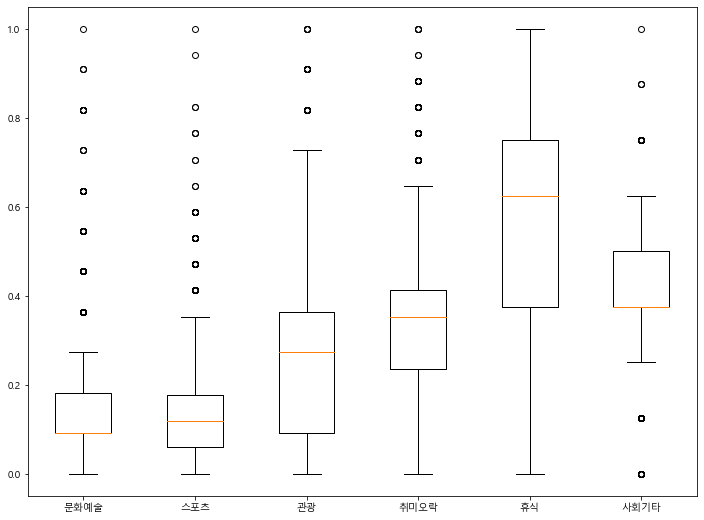

In [17]:
plt.figure(figsize=(12, 9))
plt.rc("font", family = "Malgun Gothic")
plt.boxplot(data4)
plt.xticks([1,2,3,4,5,6], ['문화예술', '스포츠', '관광', '취미오락', '휴식', '사회기타'])
plt.rc("font", family = "Malgun Gothic")
plt.show()

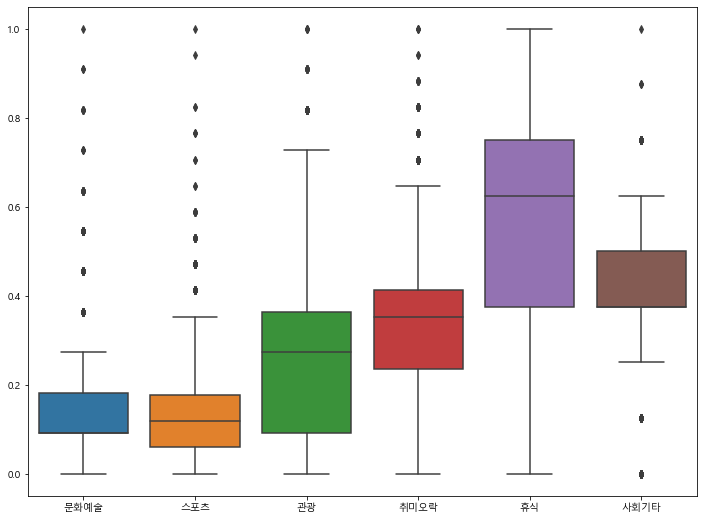

In [18]:
plt.rcParams['font.family'] = 'Malgun Gothic'
bxp=data4.loc[:,['문화예술', '스포츠', '관광', '취미오락', '휴식', '사회기타']]
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,9
fig, ax = plt.subplots()
sns.set_style('white')
bxp2 = sns.boxplot(data=bxp)
plt.rcParams['font.family'] = 'Malgun Gothic'

## 3. 여가활동비용 자료 처리

In [19]:
data5 = data1.loc[:,['문9.지난 1년간 여가활동을 위한 지출액(월 평균)']]
data5

,문9.지난 1년간 여가활동을 위한 지출액(월 평균)
73,100000
79,50000
89,100000
90,150000
149,300000
...,...
10078,100000
10079,500000
10082,200000
10083,100000


In [20]:
data5.describe()

,문9.지난 1년간 여가활동을 위한 지출액(월 평균)
count,3.180000e+03
mean,1.813809e+05
std,1.871172e+05
min,0.000000e+00
25%,6.000000e+04
50%,1.200000e+05
75%,2.500000e+05
max,5.100000e+06


In [21]:
data5.value_counts().sort_index()

문9.지난 1년간 여가활동을 위한 지출액(월 평균)
0                                20
1000                              1
3000                              1
5000                              5
10000                            43
15000                             5
20000                            64
20300                             1
25000                             4
26000                             1
30000                           179
35000                             2
40000                            35
45000                             1
50000                           422
53000                             1
55000                             1
60000                            43
70000                            58
75000                             1
80000                            43
85000                             1
90000                             3
100000                          640
110000                            2
120000                           18
130000                            6

#### 3-A. 결측값 확인

In [22]:
data5.isnull().any()

문9.지난 1년간 여가활동을 위한 지출액(월 평균)    False
dtype: bool

#### 3-B. 사분위수 범위 확인

In [23]:
print(data5.quantile(.25))
print(data5.quantile(.5))
print(data5.quantile(.75))

문9.지난 1년간 여가활동을 위한 지출액(월 평균)    60000.0
Name: 0.25, dtype: float64
문9.지난 1년간 여가활동을 위한 지출액(월 평균)    120000.0
Name: 0.5, dtype: float64
문9.지난 1년간 여가활동을 위한 지출액(월 평균)    250000.0
Name: 0.75, dtype: float64


#### 3-C. 사분위수 범위로 나누어 처리

In [24]:
data5.loc[data5['문9.지난 1년간 여가활동을 위한 지출액(월 평균)'] < 60000, '여가비용'] = 1
data5.loc[data5['문9.지난 1년간 여가활동을 위한 지출액(월 평균)'] == 60000, '여가비용'] = 1
data5.loc[data5['문9.지난 1년간 여가활동을 위한 지출액(월 평균)'] > 60000, '여가비용'] = 2
data5.loc[data5['문9.지난 1년간 여가활동을 위한 지출액(월 평균)'] > 120000, '여가비용'] = 3
data5.loc[data5['문9.지난 1년간 여가활동을 위한 지출액(월 평균)'] > 250000, '여가비용'] = 4

In [25]:
data5

,문9.지난 1년간 여가활동을 위한 지출액(월 평균),여가비용
73,100000,2.0
79,50000,1.0
89,100000,2.0
90,150000,3.0
149,300000,4.0
...,...,...
10078,100000,2.0
10079,500000,4.0
10082,200000,3.0
10083,100000,2.0


In [26]:
data6 = data5.loc[:,['여가비용']]
data6

,여가비용
73,2.0
79,1.0
89,2.0
90,3.0
149,4.0
...,...
10078,2.0
10079,4.0
10082,3.0
10083,2.0


#### 3-D. Boxplot

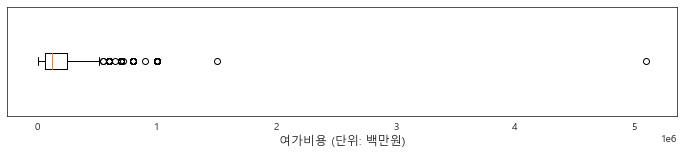

In [27]:
plt.figure(figsize=(12, 2))
plt.boxplot(data5['문9.지난 1년간 여가활동을 위한 지출액(월 평균)'], vert=False)
plt.xlabel("여가비용 (단위: 백만원)", size = 12)
plt.yticks([0], [''], size = 12)
plt.show()

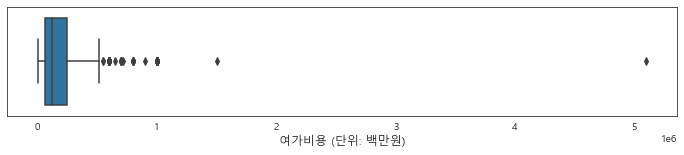

In [28]:
plt.rcParams['font.family'] = 'Malgun Gothic'
bxp=data5.loc[:,['문9.지난 1년간 여가활동을 위한 지출액(월 평균)']]
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,2
fig, ax = plt.subplots()
sns.set_style('white')
bxp2 = sns.boxplot(data=bxp, orient="h")
plt.xlabel("여가비용 (단위: 백만원)", size = 12)
plt.yticks([0], [''], size = 12)
plt.rcParams['font.family'] = 'Malgun Gothic'

## 4. 여가활동시간 자료 처리

In [29]:
data7 = data1.loc[:,['문13.지난 1년 간 하루 평균 여가시간 - 평일', '문13.지난 1년 간 하루 평균 여가시간 - 휴일']]
data7['평일여가충분도'] = data1['문13.지난 1년 간 여가시간 충분도 - 평일']
data7['휴일여가충분도'] = data1['문13.지난 1년 간 여가시간 충분도 - 휴일']
data7

,문13.지난 1년 간 하루 평균 여가시간 - 평일,문13.지난 1년 간 하루 평균 여가시간 - 휴일,평일여가충분도,휴일여가충분도
73,10.0,10.0,6,6
79,10.0,15.0,6,6
89,2.0,3.0,1,1
90,2.0,5.0,2,4
149,5.0,10.0,7,7
...,...,...,...,...
10078,3.0,8.0,4,5
10079,4.0,6.0,4,5
10082,2.0,3.0,3,4
10083,3.0,8.0,3,7


In [30]:
data7.describe()

,문13.지난 1년 간 하루 평균 여가시간 - 평일,문13.지난 1년 간 하루 평균 여가시간 - 휴일,평일여가충분도,휴일여가충분도
count,3180.000000,3180.000000,3180.000000,3180.000000
mean,3.407107,5.759088,4.385849,4.926101
std,1.821885,2.781308,1.350447,1.329089
min,0.000000,0.000000,1.000000,1.000000
25%,2.000000,4.000000,4.000000,4.000000
50%,3.000000,5.000000,4.000000,5.000000
75%,4.000000,8.000000,5.000000,6.000000
max,16.000000,18.000000,7.000000,7.000000


In [31]:
data7['문13.지난 1년 간 하루 평균 여가시간 - 평일'].value_counts().sort_index()

0.0       1
0.3       1
0.5       3
1.0     287
1.3       2
1.5       4
2.0     785
2.5       7
2.7       1
3.0     836
3.3       1
3.5      11
4.0     562
4.2       3
4.5       6
4.6       1
4.8       1
4.9       1
5.0     325
5.2       2
5.3       3
5.4       2
5.5       7
5.7       1
5.8       1
6.0     161
6.5       1
6.8       1
7.0      46
7.4       1
8.0      57
8.5       1
9.0       6
10.0     42
12.0      4
13.0      1
14.0      1
15.0      3
16.0      1
Name: 문13.지난 1년 간 하루 평균 여가시간 - 평일, dtype: int64

In [32]:
data7['문13.지난 1년 간 하루 평균 여가시간 - 휴일'].value_counts().sort_index()

0.0       3
1.0      54
1.5       1
2.0     250
2.5       3
3.0     401
3.5       1
4.0     468
4.4       1
4.5       6
4.9       1
5.0     521
5.5       4
6.0     424
6.3       3
6.5       6
6.8       1
7.0     137
7.2       1
7.3       1
7.4       1
8.0     393
8.5       5
9.0      35
10.0    345
11.0      5
12.0     71
13.0      7
14.0      5
15.0     20
16.0      4
18.0      2
Name: 문13.지난 1년 간 하루 평균 여가시간 - 휴일, dtype: int64

In [33]:
data7['평일여가충분도'].value_counts().sort_index()

1      58
2     267
3     357
4    1049
5     779
6     497
7     173
Name: 평일여가충분도, dtype: int64

In [34]:
data7['휴일여가충분도'].value_counts().sort_index()

1     39
2    148
3    190
4    751
5    891
6    826
7    335
Name: 휴일여가충분도, dtype: int64

#### 4-A. 결측값 확인

In [35]:
data7.isnull().any()

문13.지난 1년 간 하루 평균 여가시간 - 평일    False
문13.지난 1년 간 하루 평균 여가시간 - 휴일    False
평일여가충분도                        False
휴일여가충분도                        False
dtype: bool

#### 4-B. 시간 단위로 나누어 처리. (1,3,5,7,9 시간)

In [36]:
data7.loc[data7['문13.지난 1년 간 하루 평균 여가시간 - 평일'] < 3, '평일여가시간'] = 1
data7.loc[data7['문13.지난 1년 간 하루 평균 여가시간 - 평일'] == 3, '평일여가시간'] = 1
data7.loc[data7['문13.지난 1년 간 하루 평균 여가시간 - 평일'] > 3, '평일여가시간'] = 2
data7.loc[data7['문13.지난 1년 간 하루 평균 여가시간 - 평일'] > 5, '평일여가시간'] = 3
data7.loc[data7['문13.지난 1년 간 하루 평균 여가시간 - 평일'] > 7, '평일여가시간'] = 4
data7.loc[data7['문13.지난 1년 간 하루 평균 여가시간 - 평일'] > 9, '평일여가시간'] = 5

data7.loc[data7['문13.지난 1년 간 하루 평균 여가시간 - 휴일'] < 3, '휴일여가시간'] = 1
data7.loc[data7['문13.지난 1년 간 하루 평균 여가시간 - 휴일'] == 3, '휴일여가시간'] = 1
data7.loc[data7['문13.지난 1년 간 하루 평균 여가시간 - 휴일'] > 3, '휴일여가시간'] = 2
data7.loc[data7['문13.지난 1년 간 하루 평균 여가시간 - 휴일'] > 5, '휴일여가시간'] = 3
data7.loc[data7['문13.지난 1년 간 하루 평균 여가시간 - 휴일'] > 7, '휴일여가시간'] = 4
data7.loc[data7['문13.지난 1년 간 하루 평균 여가시간 - 휴일'] > 9, '휴일여가시간'] = 5

In [37]:
data7

,문13.지난 1년 간 하루 평균 여가시간 - 평일,문13.지난 1년 간 하루 평균 여가시간 - 휴일,평일여가충분도,휴일여가충분도,평일여가시간,휴일여가시간
73,10.0,10.0,6,6,5.0,5.0
79,10.0,15.0,6,6,5.0,5.0
89,2.0,3.0,1,1,1.0,1.0
90,2.0,5.0,2,4,1.0,2.0
149,5.0,10.0,7,7,2.0,5.0
...,...,...,...,...,...,...
10078,3.0,8.0,4,5,1.0,4.0
10079,4.0,6.0,4,5,2.0,3.0
10082,2.0,3.0,3,4,1.0,1.0
10083,3.0,8.0,3,7,1.0,4.0


#### 4.C - Boxplot

([<matplotlib.axis.YTick at 0x1c7fc5d0df0>,
 [Text(0, 1, '평일여가시간'), Text(0, 2, '휴일여가시간')])

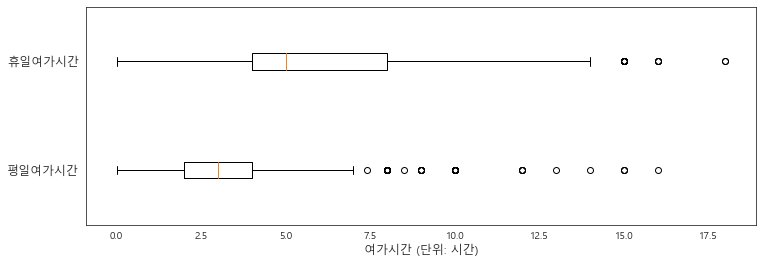

In [38]:
plt.figure(figsize=(12, 4))
bxpd1 = [data7['문13.지난 1년 간 하루 평균 여가시간 - 평일'], data7['문13.지난 1년 간 하루 평균 여가시간 - 휴일']]
plt.xlabel("여가시간 (단위: 시간)", size = 12)
plt.boxplot(bxpd1, vert = False)
plt.yticks([1, 2], ['평일여가시간', '휴일여가시간'], size = 12)

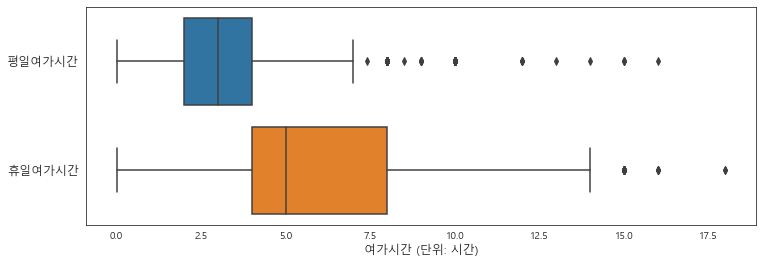

In [39]:
plt.rcParams['font.family'] = 'Malgun Gothic'
bxp=data7.loc[:,['문13.지난 1년 간 하루 평균 여가시간 - 평일','문13.지난 1년 간 하루 평균 여가시간 - 휴일']]
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,4
fig, ax = plt.subplots()
sns.set_style('white')
bxp2 = sns.boxplot(data=bxp, orient="h")
plt.xlabel("여가시간 (단위: 시간)", size = 12)
plt.yticks([0, 1], ['평일여가시간', '휴일여가시간'], size = 12)
plt.rcParams['font.family'] = 'Malgun Gothic'

In [40]:
data8 = data7.loc[:,['평일여가시간', '휴일여가시간', '평일여가충분도', '휴일여가충분도']]
data8

,평일여가시간,휴일여가시간,평일여가충분도,휴일여가충분도
73,5.0,5.0,6,6
79,5.0,5.0,6,6
89,1.0,1.0,1,1
90,1.0,2.0,2,4
149,2.0,5.0,7,7
...,...,...,...,...
10078,1.0,4.0,4,5
10079,2.0,3.0,4,5
10082,1.0,1.0,3,4
10083,1.0,4.0,3,7


## 6. 여가공간만족도 자료 처리

In [41]:
data9 = data1.loc[:, ['문18.생활권 내 공공문화 및 여가시설 존재 인식', '문18.생활권 내 공공문화 및 여가시설 이용 충분도', '문18.생활권 내 공공문화 및 여가시설 프로그램 인지도', '문18.생활권 내 공공문화 및 여가시설 프로그램 충분도', '문21.민간 여가산업 만족도- 여가 관련 공간산업', '문21.민간 여가산업 만족도- 여가 관련 용품산업', '문21.민간 여가산업 만족도- 여가 관련 서비스산업']]
data9

,문18.생활권 내 공공문화 및 여가시설 존재 인식,문18.생활권 내 공공문화 및 여가시설 이용 충분도,문18.생활권 내 공공문화 및 여가시설 프로그램 인지도,문18.생활권 내 공공문화 및 여가시설 프로그램 충분도,문21.민간 여가산업 만족도- 여가 관련 공간산업,문21.민간 여가산업 만족도- 여가 관련 용품산업,문21.민간 여가산업 만족도- 여가 관련 서비스산업
73,1,1,1,1,6,6,6
79,5,4,3,4,6,6,5
89,3,2,3,3,4,4,4
90,4,5,4,4,5,4,5
149,2,4,1,4,5,5,4
...,...,...,...,...,...,...,...
10078,4,4,4,4,5,5,5
10079,4,4,3,3,6,6,6
10082,7,3,3,5,7,7,7
10083,4,4,4,4,4,4,4


In [42]:
data9.describe()

,문18.생활권 내 공공문화 및 여가시설 존재 인식,문18.생활권 내 공공문화 및 여가시설 이용 충분도,문18.생활권 내 공공문화 및 여가시설 프로그램 인지도,문18.생활권 내 공공문화 및 여가시설 프로그램 충분도,문21.민간 여가산업 만족도- 여가 관련 공간산업,문21.민간 여가산업 만족도- 여가 관련 용품산업,문21.민간 여가산업 만족도- 여가 관련 서비스산업
count,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000
mean,4.376101,4.235849,3.952201,4.126415,4.847484,4.884277,4.750943
std,1.307921,1.271943,1.423606,1.245209,1.010643,1.109230,1.079528
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000
50%,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000
75%,5.000000,5.000000,5.000000,5.000000,6.000000,6.000000,5.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [43]:
data9['문18.생활권 내 공공문화 및 여가시설 존재 인식'].value_counts().sort_index()

1     83
2    224
3    385
4    929
5    912
6    575
7     72
Name: 문18.생활권 내 공공문화 및 여가시설 존재 인식, dtype: int64

In [44]:
data9['문18.생활권 내 공공문화 및 여가시설 이용 충분도'].value_counts().sort_index()

1      59
2     261
3     454
4    1108
5     782
6     427
7      89
Name: 문18.생활권 내 공공문화 및 여가시설 이용 충분도, dtype: int64

In [45]:
data9['문18.생활권 내 공공문화 및 여가시설 프로그램 인지도'].value_counts().sort_index()

1    178
2    364
3    552
4    933
5    724
6    349
7     80
Name: 문18.생활권 내 공공문화 및 여가시설 프로그램 인지도, dtype: int64

In [46]:
data9['문18.생활권 내 공공문화 및 여가시설 프로그램 충분도'].value_counts().sort_index()

1      73
2     282
3     479
4    1143
5     807
6     331
7      65
Name: 문18.생활권 내 공공문화 및 여가시설 프로그램 충분도, dtype: int64

In [47]:
data9['문21.민간 여가산업 만족도- 여가 관련 공간산업'].value_counts().sort_index()

1       5
2      58
3     153
4     940
5    1175
6     743
7     106
Name: 문21.민간 여가산업 만족도- 여가 관련 공간산업, dtype: int64

In [48]:
data9['문21.민간 여가산업 만족도- 여가 관련 용품산업'].value_counts().sort_index()

1      11
2      58
3     221
4     867
5    1037
6     813
7     173
Name: 문21.민간 여가산업 만족도- 여가 관련 용품산업, dtype: int64

In [49]:
data9['문21.민간 여가산업 만족도- 여가 관련 서비스산업'].value_counts().sort_index()

1      16
2      55
3     244
4     990
5    1095
6     645
7     135
Name: 문21.민간 여가산업 만족도- 여가 관련 서비스산업, dtype: int64

#### 6-A. 결측값 확인

In [50]:
data9.isnull().any()

문18.생활권 내 공공문화 및 여가시설 존재 인식       False
문18.생활권 내 공공문화 및 여가시설 이용 충분도      False
문18.생활권 내 공공문화 및 여가시설 프로그램 인지도    False
문18.생활권 내 공공문화 및 여가시설 프로그램 충분도    False
문21.민간 여가산업 만족도- 여가 관련 공간산업       False
문21.민간 여가산업 만족도- 여가 관련 용품산업       False
문21.민간 여가산업 만족도- 여가 관련 서비스산업      False
dtype: bool

#### 6-B. 크론바하-알파값 확인 (내적일관성)

In [51]:
data10 = data9.iloc[:,0:4] #공공여가시설인식및충분도
data11 = data9.iloc[:,4:7] #민간여가시설만족도
import pingouin
print(pingouin.cronbach_alpha(data=data10)) #공공여가시설인식및충분도
print(pingouin.cronbach_alpha(data=data11)) #민간여가시설만족도

(0.9068887516666538, array([0.901, 0.912]))
(0.8647764167082908, array([0.856, 0.873]))


#### 6-C. 변수 리코딩 (공공여가시설충분도, 민간여가시설만족도)

In [52]:
data12 = pd.DataFrame() #공공여가시설만족도평균 (2,4번 설문 문항만 사용)
data13 = pd.DataFrame() #민간여가시설만족도평균

data12['공공여가시설충분도'] = (data9['문18.생활권 내 공공문화 및 여가시설 이용 충분도'] + data9['문18.생활권 내 공공문화 및 여가시설 프로그램 충분도'])/2 #공공여가시설충분도
data13['민간여가산업만족도'] = (data11['문21.민간 여가산업 만족도- 여가 관련 공간산업'] + data11['문21.민간 여가산업 만족도- 여가 관련 용품산업'] + data11['문21.민간 여가산업 만족도- 여가 관련 서비스산업'])/3 #민간여가시설만족도

## 7. 일과여가의균형 자료 처리

In [53]:
data14 = data1.loc[:, ['문28.일(학업)과 여가의 균형']]

In [54]:
data14

,문28.일(학업)과 여가의 균형
73,4
79,5
89,1
90,5
149,4
...,...
10078,3
10079,4
10082,6
10083,2


In [55]:
data14.describe()

,문28.일(학업)과 여가의 균형
count,3180.000000
mean,3.801572
std,1.137288
min,1.000000
25%,3.000000
50%,4.000000
75%,4.000000
max,7.000000


In [56]:
data14.value_counts().sort_index()

문28.일(학업)과 여가의 균형
1                      81
2                     370
3                     608
4                    1378
5                     539
6                     191
7                      13
dtype: int64

#### 7-A. 결측값 확인

In [57]:
data14.isnull().any()

문28.일(학업)과 여가의 균형    False
dtype: bool

#### 7-B. 변수 리코딩

In [58]:
data14.loc[data14['문28.일(학업)과 여가의 균형']== 1, '일과여가의균형'] = 'A' #1.2.3 → A: 일에 집중하는 집단
data14.loc[data14['문28.일(학업)과 여가의 균형']== 2, '일과여가의균형'] = 'A' 
data14.loc[data14['문28.일(학업)과 여가의 균형']== 3, '일과여가의균형'] = 'A'

data14.loc[data14['문28.일(학업)과 여가의 균형']== 4, '일과여가의균형'] = 'B' #4 → B: 균형을 이루는 집단

data14.loc[data14['문28.일(학업)과 여가의 균형']== 5, '일과여가의균형'] = 'C' #5,6,7 → C: 여가에 집중하는 집단
data14.loc[data14['문28.일(학업)과 여가의 균형']== 6, '일과여가의균형'] = 'C'
data14.loc[data14['문28.일(학업)과 여가의 균형']== 7, '일과여가의균형'] = 'C'


In [59]:
data14

,문28.일(학업)과 여가의 균형,일과여가의균형
73,4,B
79,5,C
89,1,A
90,5,C
149,4,B
...,...,...
10078,3,A
10079,4,B
10082,6,C
10083,2,A


#### 7-C. 그래프

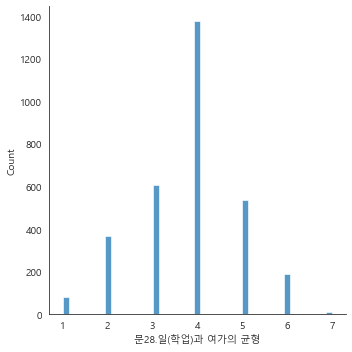

In [60]:
sns.displot(data14['문28.일(학업)과 여가의 균형'])

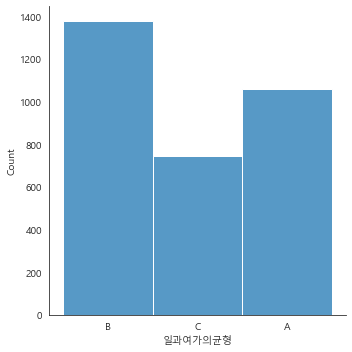

In [61]:
sns.displot(data14['일과여가의균형'])

#### 7-D. Categorical 변수로 원-핫 인코딩 처리 (더미변수화)

In [62]:
data15 = pd.get_dummies(data14['일과여가의균형'], drop_first=True, prefix='일과여가의균형') 

In [63]:
data15

,일과여가의균형_B,일과여가의균형_C
73,1,0
79,0,1
89,0,0
90,0,1
149,1,0
...,...,...
10078,0,0
10079,1,0
10082,0,1
10083,0,0


## 8. 여가인식 자료 처리

In [64]:
data16 = pd.DataFrame()

data16['여가인식:삶의필수요건'] = data1['문31.여가인식 - 여가활동이 삶의 필수적인 요건이다']
data16['여가인식:삶의영향력'] = data1['문32.여가인식 - 여가활동이 삶의 긍정적 영향을 끼치는 지 여부']

In [65]:
data16

,여가인식:삶의필수요건,여가인식:삶의영향력
73,5,5
79,6,6
89,5,6
90,5,6
149,6,6
...,...,...
10078,5,5
10079,7,7
10082,7,7
10083,6,7


In [66]:
data16.describe()

,여가인식:삶의필수요건,여가인식:삶의영향력
count,3180.000000,3180.000000
mean,5.695597,5.778931
std,0.924542,0.860804
min,1.000000,1.000000
25%,5.000000,5.000000
50%,6.000000,6.000000
75%,6.000000,6.000000
max,7.000000,7.000000


In [67]:
data16['여가인식:삶의필수요건'].value_counts().sort_index()

1       2
2       7
3      20
4     248
5    1026
6    1225
7     652
Name: 여가인식:삶의필수요건, dtype: int64

In [68]:
data16['여가인식:삶의영향력'].value_counts().sort_index()

1       1
2       1
3       6
4     200
5     946
6    1356
7     670
Name: 여가인식:삶의영향력, dtype: int64

#### 8-A. 결측값 확인

In [69]:
data16.isnull().any()

여가인식:삶의필수요건    False
여가인식:삶의영향력     False
dtype: bool

#### 8-B. 그래프

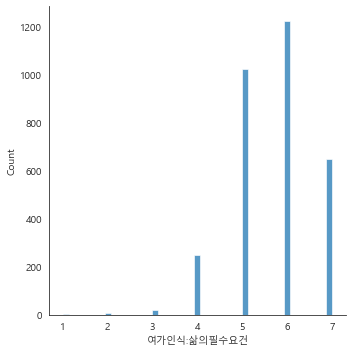

In [70]:
sns.displot(data16['여가인식:삶의필수요건'])

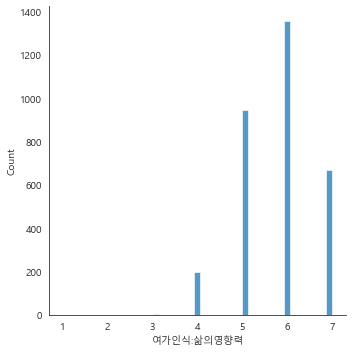

In [71]:
sns.displot(data16['여가인식:삶의영향력'])

## 9. 인구사회학적 요인 (성별, 교육수준, 배우자유무)

In [72]:
data17 = data1.loc[:, ['문43.응답자 성별', '문39.본인의 교육정도 - 최종학력', '혼인상태']]

In [73]:
data17

,문43.응답자 성별,문39.본인의 교육정도 - 최종학력,혼인상태
73,2,6,1.0
79,1,4,1.0
89,2,5,2.0
90,2,5,2.0
149,1,4,2.0
...,...,...,...
10078,1,5,1.0
10079,2,5,1.0
10082,1,5,1.0
10083,1,4,1.0


#### 9-A. 결측값 확인

In [74]:
data17.isnull().any() #혼인 상태에 True값이 존재

문43.응답자 성별             False
문39.본인의 교육정도 - 최종학력    False
혼인상태                    True
dtype: bool

In [75]:
data17[data17['혼인상태'].isnull()] #결측치 1개 존재.(해당자는 삭제 예정.)

,문43.응답자 성별,문39.본인의 교육정도 - 최종학력,혼인상태
7080,1,6,NaN


In [76]:
pd.value_counts(data17['문43.응답자 성별']).sort_index()

1    1664
2    1516
Name: 문43.응답자 성별, dtype: int64

In [77]:
pd.value_counts(data17['문39.본인의 교육정도 - 최종학력']).sort_index()

1       1
2       2
3       5
4     594
5     695
6    1819
7      53
8      11
Name: 문39.본인의 교육정도 - 최종학력, dtype: int64

In [78]:
pd.value_counts(data17['혼인상태']).sort_index()

1.0    1967
2.0    1184
3.0      28
Name: 혼인상태, dtype: int64

In [79]:
data17.describe()

,문43.응답자 성별,문39.본인의 교육정도 - 최종학력,혼인상태
count,3180.000000,3180.000000,3179.000000
mean,1.476730,5.422642,1.390060
std,0.499537,0.833773,0.505578
min,1.000000,1.000000,1.000000
25%,1.000000,5.000000,1.000000
50%,1.000000,6.000000,1.000000
75%,2.000000,6.000000,2.000000
max,2.000000,8.000000,3.000000


#### 9-B. 변수 리코딩

In [80]:
data17.loc[data17['문43.응답자 성별']== 1, '성별 '] = "M" # 성별 1 = 남성 
data17.loc[data17['문43.응답자 성별']== 2, '성별 '] = "W" # 성별 2 = 여성

data17.loc[data17['문39.본인의 교육정도 - 최종학력']== 1, '교육수준'] = "A" # 무학
data17.loc[data17['문39.본인의 교육정도 - 최종학력']== 2, '교육수준'] = "A" # 초등학교
data17.loc[data17['문39.본인의 교육정도 - 최종학력']== 3, '교육수준'] = "A" # 중학교
data17.loc[data17['문39.본인의 교육정도 - 최종학력']== 4, '교육수준'] = "A" # 고등학교
data17.loc[data17['문39.본인의 교육정도 - 최종학력']== 5, '교육수준'] = "B" # 2,3년제 대학교
data17.loc[data17['문39.본인의 교육정도 - 최종학력']== 6, '교육수준'] = "B" # 4년제 대학교
data17.loc[data17['문39.본인의 교육정도 - 최종학력']== 7, '교육수준'] = "B" # 대학원 석사
data17.loc[data17['문39.본인의 교육정도 - 최종학력']== 8, '교육수준'] = "B" # 대학원 박사
# 고등학교 이하 = 1, 대학교 이상 = 2로 처리.


data17.loc[data17['혼인상태']== 1, '배우자유무'] = "N" # 배우자 없음
data17.loc[data17['혼인상태']== 2, '배우자유무'] = "Y" # 배우자 있음
data17.loc[data17['혼인상태']== 3, '배우자유무'] = "N" # 이혼한 경우, 배우자 없음으로 처리.



In [81]:
data18 = data17.iloc[:,3:6]
data18

,성별,교육수준,배우자유무
73,W,B,N
79,M,A,N
89,W,B,Y
90,W,B,Y
149,M,A,Y
...,...,...,...
10078,M,B,N
10079,W,B,N
10082,M,B,N
10083,M,A,N


## 10. 주평균근무시간 자료 처리

In [82]:
data19 = data1.loc[:, ['문47.주당 평균 근무 시간']] #NAN으로 응답한 사람은 일하지 않는 사람들임
data19

,문47.주당 평균 근무 시간
73,NaN
79,20.0
89,NaN
90,40.0
149,NaN
...,...
10078,40.0
10079,40.0
10082,NaN
10083,52.0


#### 10-A. 결측값 처리

In [83]:
data19['문47.주당 평균 근무 시간'].replace(np.nan, 0, inplace=True) #일하지 않는 사람들 = 0시간으로 리코딩
data19

,문47.주당 평균 근무 시간
73,0.0
79,20.0
89,0.0
90,40.0
149,0.0
...,...
10078,40.0
10079,40.0
10082,0.0
10083,52.0


In [84]:
data19.value_counts().sort_index()

문47.주당 평균 근무 시간
0.0                1213
2.0                   1
4.0                   3
5.0                   4
6.0                   2
7.0                   1
8.0                   5
10.0                  7
11.0                  2
12.0                  4
13.0                  1
14.0                  3
15.0                  3
16.0                  2
18.0                  2
20.0                 28
21.0                  1
22.0                  1
24.0                  6
25.0                  7
28.0                  4
30.0                 44
32.0                  3
33.0                  1
34.0                  1
35.0                 16
36.0                  3
37.0                  1
38.0                  2
40.0                902
42.0                 13
43.0                  1
44.0                 12
45.0                151
46.0                  3
48.0                135
49.0                  2
50.0                175
51.0                  1
52.0                 71
53.0                  2


In [85]:
data19.describe()

,문47.주당 평균 근무 시간
count,3180.000000
mean,27.633648
std,23.286002
min,0.000000
25%,0.000000
50%,40.000000
75%,45.000000
max,100.000000


#### 10-B. 변수 리코딩

#### 우리나라 일주일 기준으로 법정근로시간은 기본 40시간, 최대 52시간임.

일을 하지 않는 경우 = 0

0시간 이상, 40시간 이하의 경우 = 1

40시간 초과, 52시간 이하의 경우 = 2

52시간 초과의 경우 = 3으로 리코딩


In [86]:
data19.loc[data19['문47.주당 평균 근무 시간'] == 0, '주평균근무시간'] = 0
data19.loc[data19['문47.주당 평균 근무 시간'] > 0, '주평균근무시간'] = 1
data19.loc[data19['문47.주당 평균 근무 시간'] == 40, '주평균근무시간'] = 1
data19.loc[data19['문47.주당 평균 근무 시간'] > 40, '주평균근무시간'] = 2
data19.loc[data19['문47.주당 평균 근무 시간'] > 52, '주평균근무시간'] = 3

In [87]:
data19

,문47.주당 평균 근무 시간,주평균근무시간
73,0.0,0.0
79,20.0,1.0
89,0.0,0.0
90,40.0,1.0
149,0.0,0.0
...,...,...
10078,40.0,1.0
10079,40.0,1.0
10082,0.0,0.0
10083,52.0,2.0


#### 10-C. 그래프

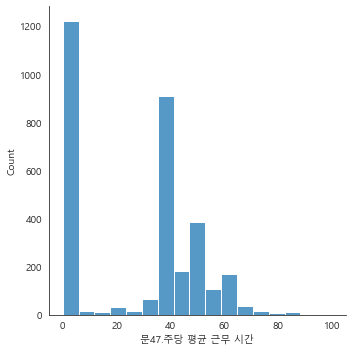

In [88]:
sns.displot(data19['문47.주당 평균 근무 시간'])

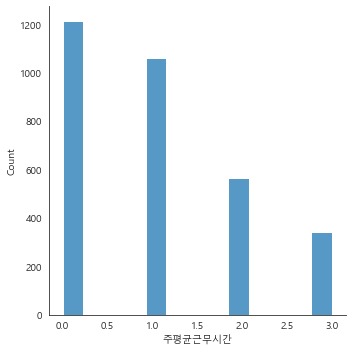

In [89]:
sns.displot(data19['주평균근무시간'])

In [90]:
data20 = data19.iloc[:, 1:]
data20

,주평균근무시간
73,0.0
79,1.0
89,0.0
90,1.0
149,0.0
...,...
10078,1.0
10079,1.0
10082,0.0
10083,2.0


## 11. 여가생활만족도 변수처리 (결과변수)

In [91]:
data21 = data1.loc[:, ['문30.전반적 여가생활 만족도']]
data21

,문30.전반적 여가생활 만족도
73,5
79,5
89,1
90,4
149,6
...,...
10078,4
10079,5
10082,7
10083,4


In [92]:
data21.value_counts().sort_index()

문30.전반적 여가생활 만족도
1                     30
2                    131
3                    320
4                    920
5                   1134
6                    562
7                     83
dtype: int64

In [93]:
data21.describe()

,문30.전반적 여가생활 만족도
count,3180.000000
mean,4.577044
std,1.147247
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,7.000000


#### 11-A. 결측값 확인

In [94]:
data21['문30.전반적 여가생활 만족도'].isnull().any()

False

#### 11-B. 변수 리코딩 (이진분류)

1,2,3,4로 응답한 사람 → 불만족 (A)

5,6,7로 응답한 사람 →만족 (B)

In [95]:
data21.loc[data21['문30.전반적 여가생활 만족도']== 1, '여가생활만족도'] = "A"
data21.loc[data21['문30.전반적 여가생활 만족도']== 2, '여가생활만족도'] = "A"
data21.loc[data21['문30.전반적 여가생활 만족도']== 3, '여가생활만족도'] = "A"
data21.loc[data21['문30.전반적 여가생활 만족도']== 4, '여가생활만족도'] = "A"

data21.loc[data21['문30.전반적 여가생활 만족도']== 5, '여가생활만족도'] = "B"
data21.loc[data21['문30.전반적 여가생활 만족도']== 6, '여가생활만족도'] = "B"
data21.loc[data21['문30.전반적 여가생활 만족도']== 7, '여가생활만족도'] = "B"


In [96]:
data21

,문30.전반적 여가생활 만족도,여가생활만족도
73,5,B
79,5,B
89,1,A
90,4,A
149,6,B
...,...,...
10078,4,A
10079,5,B
10082,7,B
10083,4,A


#### 11-C. 그래프

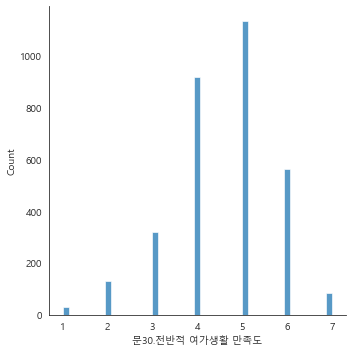

In [97]:
sns.displot(data21['문30.전반적 여가생활 만족도'])

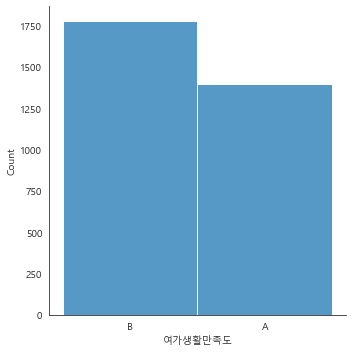

In [98]:
sns.displot(data21['여가생활만족도'])

In [99]:
data22 = data21.iloc[:, 1:]
data22

,여가생활만족도
73,B
79,B
89,A
90,A
149,B
...,...
10078,A
10079,B
10082,B
10083,A


## 12. 자료 정리

#### 12-A. 변수 합치기

In [100]:
data23 = pd.concat([data4, data6, data8, data12, data13, data15, data16, data18, data20, data22], axis=1)
pd.set_option('display.max_columns', 100)
data23

,문화예술,스포츠,관광,취미오락,휴식,사회기타,여가비용,평일여가시간,휴일여가시간,평일여가충분도,휴일여가충분도,공공여가시설충분도,민간여가산업만족도,일과여가의균형_B,일과여가의균형_C,여가인식:삶의필수요건,여가인식:삶의영향력,성별,교육수준,배우자유무,주평균근무시간,여가생활만족도
73,0.000000,0.000000,0.000000,0.352941,0.500,0.250,2.0,5.0,5.0,6,6,1.0,6.000000,1,0,5,5,W,B,N,0.0,B
79,0.000000,0.058824,0.363636,0.294118,0.375,0.375,1.0,5.0,5.0,6,6,4.0,5.666667,0,1,6,6,M,A,N,1.0,B
89,0.000000,0.000000,0.545455,0.411765,0.750,0.500,2.0,1.0,1.0,1,1,2.5,4.000000,0,0,5,6,W,B,Y,0.0,A
90,0.000000,0.058824,0.454545,0.411765,0.750,0.500,3.0,1.0,2.0,2,4,4.5,4.666667,0,1,5,6,W,B,Y,1.0,A
149,0.000000,0.058824,0.000000,0.294118,0.500,0.250,4.0,2.0,5.0,7,7,4.0,4.666667,1,0,6,6,M,A,Y,0.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10078,0.090909,0.117647,0.000000,0.176471,0.500,0.625,2.0,1.0,4.0,4,5,4.0,5.000000,0,0,5,5,M,B,N,1.0,A
10079,0.181818,0.117647,0.090909,0.117647,0.500,0.125,4.0,2.0,3.0,4,5,3.5,6.000000,1,0,7,7,W,B,N,1.0,B
10082,0.272727,0.529412,0.363636,0.470588,0.500,0.500,3.0,1.0,1.0,3,4,4.0,7.000000,0,1,7,7,M,B,N,0.0,B
10083,0.090909,0.176471,0.000000,0.352941,0.875,0.625,2.0,1.0,4.0,3,7,4.0,4.000000,0,0,6,7,M,A,N,2.0,A


#### 12-B. 결측값이 있는 행 삭제 (위의 배우자유무 항목에서 결측값 1명 존재)

In [101]:
data23[data23['배우자유무'].isnull()]

,문화예술,스포츠,관광,취미오락,휴식,사회기타,여가비용,평일여가시간,휴일여가시간,평일여가충분도,휴일여가충분도,공공여가시설충분도,민간여가산업만족도,일과여가의균형_B,일과여가의균형_C,여가인식:삶의필수요건,여가인식:삶의영향력,성별,교육수준,배우자유무,주평균근무시간,여가생활만족도
7080,0.090909,0.058824,0.090909,0.235294,0.625,0.5,3.0,1.0,4.0,5,5,4.5,4.666667,0,0,5,5,M,B,NaN,1.0,A


In [102]:
data24 = data23.dropna(axis=0)
data24

,문화예술,스포츠,관광,취미오락,휴식,사회기타,여가비용,평일여가시간,휴일여가시간,평일여가충분도,휴일여가충분도,공공여가시설충분도,민간여가산업만족도,일과여가의균형_B,일과여가의균형_C,여가인식:삶의필수요건,여가인식:삶의영향력,성별,교육수준,배우자유무,주평균근무시간,여가생활만족도
73,0.000000,0.000000,0.000000,0.352941,0.500,0.250,2.0,5.0,5.0,6,6,1.0,6.000000,1,0,5,5,W,B,N,0.0,B
79,0.000000,0.058824,0.363636,0.294118,0.375,0.375,1.0,5.0,5.0,6,6,4.0,5.666667,0,1,6,6,M,A,N,1.0,B
89,0.000000,0.000000,0.545455,0.411765,0.750,0.500,2.0,1.0,1.0,1,1,2.5,4.000000,0,0,5,6,W,B,Y,0.0,A
90,0.000000,0.058824,0.454545,0.411765,0.750,0.500,3.0,1.0,2.0,2,4,4.5,4.666667,0,1,5,6,W,B,Y,1.0,A
149,0.000000,0.058824,0.000000,0.294118,0.500,0.250,4.0,2.0,5.0,7,7,4.0,4.666667,1,0,6,6,M,A,Y,0.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10078,0.090909,0.117647,0.000000,0.176471,0.500,0.625,2.0,1.0,4.0,4,5,4.0,5.000000,0,0,5,5,M,B,N,1.0,A
10079,0.181818,0.117647,0.090909,0.117647,0.500,0.125,4.0,2.0,3.0,4,5,3.5,6.000000,1,0,7,7,W,B,N,1.0,B
10082,0.272727,0.529412,0.363636,0.470588,0.500,0.500,3.0,1.0,1.0,3,4,4.0,7.000000,0,1,7,7,M,B,N,0.0,B
10083,0.090909,0.176471,0.000000,0.352941,0.875,0.625,2.0,1.0,4.0,3,7,4.0,4.000000,0,0,6,7,M,A,N,2.0,A


#### 12-C. 상관계수 행렬

In [103]:
from scipy.stats import kendalltau, pearsonr, spearmanr
def pearsonr_co(x,y):
        return pearsonr(x,y)[0]
def pearsonr_pval(x,y):
        return pearsonr(x,y)[1]

In [104]:
data25 = data24.corr(method=pearsonr_co)
data25

,문화예술,스포츠,관광,취미오락,휴식,사회기타,여가비용,평일여가시간,휴일여가시간,평일여가충분도,휴일여가충분도,공공여가시설충분도,민간여가산업만족도,일과여가의균형_B,일과여가의균형_C,여가인식:삶의필수요건,여가인식:삶의영향력,주평균근무시간
문화예술,1.000000,0.379884,0.360400,0.333666,0.160676,0.150495,0.138204,-0.022628,-0.028027,0.022662,0.026793,0.048361,0.068046,0.038242,0.040064,0.141914,0.153016,-0.057343
스포츠,0.379884,1.000000,0.307251,0.404561,0.199189,0.217571,0.184225,0.018179,0.049464,0.018889,0.067663,0.014788,0.076031,0.065934,0.025300,0.139031,0.155815,0.010109
관광,0.360400,0.307251,1.000000,0.349954,0.327479,0.358012,0.157596,0.027778,0.045764,-0.069348,-0.067793,-0.011687,0.070592,0.020371,0.003233,0.159721,0.146633,0.011296
취미오락,0.333666,0.404561,0.349954,1.000000,0.504352,0.425967,0.122622,0.090726,0.138354,0.080896,0.067147,-0.011353,-0.002887,0.034406,0.035065,0.128810,0.150797,-0.041973
휴식,0.160676,0.199189,0.327479,0.504352,1.000000,0.467254,0.107020,0.066526,0.109592,0.004444,-0.001189,-0.024249,0.010683,0.033301,-0.041137,0.055618,0.080478,-0.006744
사회기타,0.150495,0.217571,0.358012,0.425967,0.467254,1.000000,0.083272,0.065312,0.098225,-0.019073,-0.020141,-0.063975,-0.032131,-0.003686,-0.016556,0.062490,0.066797,0.025144
여가비용,0.138204,0.184225,0.157596,0.122622,0.107020,0.083272,1.000000,0.108116,0.213953,0.025234,0.080147,-0.004798,0.097419,0.042797,-0.023006,0.201603,0.208446,0.116158
평일여가시간,-0.022628,0.018179,0.027778,0.090726,0.066526,0.065312,0.108116,1.000000,0.591397,0.383475,0.331012,-0.030807,0.063883,0.024421,0.142907,0.103795,0.087567,-0.194853
휴일여가시간,-0.028027,0.049464,0.045764,0.138354,0.109592,0.098225,0.213953,0.591397,1.000000,0.258470,0.473780,-0.046932,0.089623,0.045932,0.081108,0.155201,0.125179,-0.032308
평일여가충분도,0.022662,0.018889,-0.069348,0.080896,0.004444,-0.019073,0.025234,0.383475,0.258470,1.000000,0.693279,0.190938,0.129075,0.115901,0.185197,0.040046,0.042689,-0.140033


In [105]:
data26 = data24.corr(method=pearsonr_pval)
data26

,문화예술,스포츠,관광,취미오락,휴식,사회기타,여가비용,평일여가시간,휴일여가시간,평일여가충분도,휴일여가충분도,공공여가시설충분도,민간여가산업만족도,일과여가의균형_B,일과여가의균형_C,여가인식:삶의필수요건,여가인식:삶의영향력,주평균근무시간
문화예술,1.000000e+00,1.132145e-109,4.054740e-98,1.579980e-83,7.861598e-20,1.456096e-17,5.002678e-15,2.021345e-01,1.141242e-01,2.014587e-01,1.309633e-01,6.387113e-03,1.232649e-04,3.107387e-02,2.388727e-02,9.051848e-16,4.129399e-18,1.218459e-03
스포츠,1.132145e-109,1.000000e+00,1.791393e-70,1.740000e-125,8.298155e-30,2.267440e-35,1.152470e-25,3.055248e-01,5.278192e-03,2.870266e-01,1.346088e-04,4.045493e-01,1.775948e-05,1.991500e-04,1.538290e-01,3.431399e-15,9.935814e-19,5.688323e-01
관광,4.054740e-98,1.791393e-70,1.000000e+00,3.014592e-92,2.370407e-80,9.328756e-97,3.960098e-19,1.173701e-01,9.861736e-03,9.108097e-05,1.306455e-04,5.100860e-01,6.789004e-05,2.508778e-01,8.554217e-01,1.302830e-19,9.632438e-17,5.243237e-01
취미오락,1.579980e-83,1.740000e-125,3.014592e-92,1.000000e+00,8.917978e-205,2.485008e-140,3.999485e-12,2.992451e-07,4.672694e-15,4.951378e-06,1.514286e-04,5.222470e-01,8.707412e-01,5.241401e-02,4.805468e-02,3.095917e-13,1.253210e-17,1.794999e-02
휴식,7.861598e-20,8.298155e-30,2.370407e-80,8.917978e-205,1.000000e+00,3.561662e-172,1.456953e-09,1.743290e-04,5.816520e-10,8.022236e-01,9.465877e-01,1.716617e-01,5.470877e-01,6.046523e-02,2.036859e-02,1.706415e-03,5.541790e-06,7.038633e-01
사회기타,1.456096e-17,2.267440e-35,9.328756e-97,2.485008e-140,3.561662e-172,1.000000e+00,2.583555e-06,2.287669e-04,2.866103e-08,2.823561e-01,2.562685e-01,3.069509e-04,7.007976e-02,8.354153e-01,3.507306e-01,4.228301e-04,1.639578e-04,1.563736e-01
여가비용,5.002678e-15,1.152470e-25,3.960098e-19,3.999485e-12,1.456953e-09,2.583555e-06,1.000000e+00,9.875194e-10,3.107564e-34,1.549034e-01,6.056089e-06,7.868380e-01,3.719369e-08,1.581381e-02,1.946950e-01,1.652859e-30,1.525329e-32,5.066948e-11
평일여가시간,2.021345e-01,3.055248e-01,1.173701e-01,2.992451e-07,1.743290e-04,2.287669e-04,9.875194e-10,1.000000e+00,2.863928e-299,6.857177e-112,3.713420e-82,8.244165e-02,3.131450e-04,1.686493e-01,5.685356e-16,4.469485e-09,7.620493e-07,1.427589e-28
휴일여가시간,1.141242e-01,5.278192e-03,9.861736e-03,4.672694e-15,5.816520e-10,2.866103e-08,3.107564e-34,2.863928e-299,1.000000e+00,1.087374e-49,1.272181e-177,8.131454e-03,4.162213e-07,9.595061e-03,4.676181e-06,1.361032e-18,1.410430e-12,6.855003e-02
평일여가충분도,2.014587e-01,2.870266e-01,9.108097e-05,4.951378e-06,8.022236e-01,2.823561e-01,1.549034e-01,6.857177e-112,1.087374e-49,1.000000e+00,0.000000e+00,1.760210e-27,2.766461e-13,5.588300e-11,6.351110e-26,2.394997e-02,1.608186e-02,2.166016e-15


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5]),
 [Text(0.5, 0, '문화예술'),
  Text(1.5, 0, '스포츠'),
  Text(2.5, 0, '관광'),
  Text(3.5, 0, '취미오락'),
  Text(4.5, 0, '휴식'),
  Text(5.5, 0, '사회기타'),
  Text(6.5, 0, '여가비용'),
  Text(7.5, 0, '평일여가시간'),
  Text(8.5, 0, '휴일여가시간'),
  Text(9.5, 0, '평일여가충분도'),
  Text(10.5, 0, '휴일여가충분도'),
  Text(11.5, 0, '공공여가시설충분도'),
  Text(12.5, 0, '민간여가산업만족도'),
  Text(13.5, 0, '일과여가의균형_B'),
  Text(14.5, 0, '일과여가의균형_C'),
  Text(15.5, 0, '여가인식:삶의필수요건'),
  Text(16.5, 0, '여가인식:삶의영향력'),
  Text(17.5, 0, '주평균근무시간')])

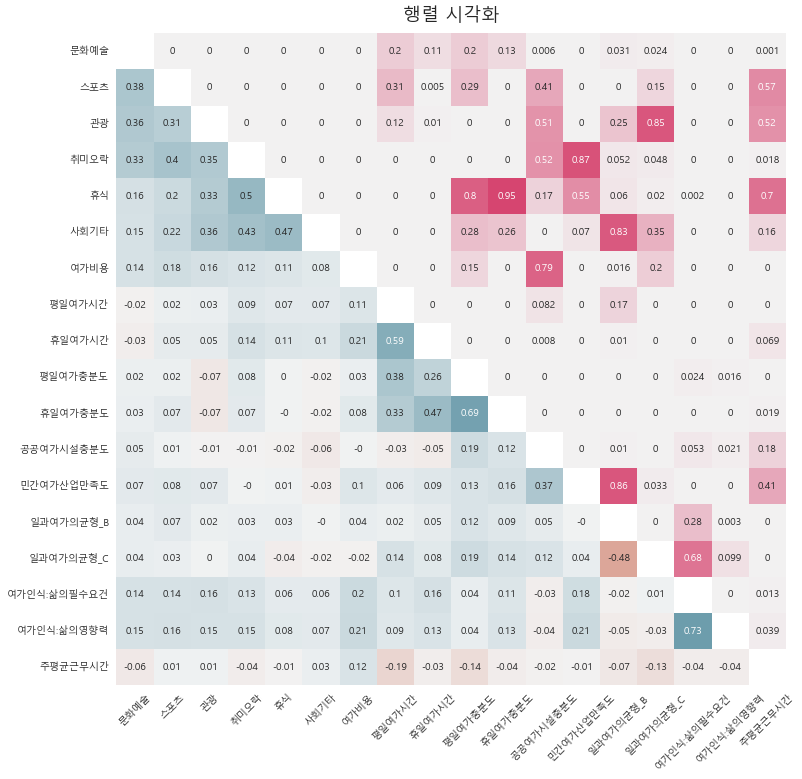

In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc("font", family = "Malgun Gothic")
plt.rc("axes", unicode_minus = False)
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.figure(figsize=(12, 12))

data27 = round(data25, 2)
data28 = round(data26, 3)

mask = np.triu(np.ones_like(data27.corr(), dtype=bool))
mask2 = np.tril(np.ones_like(data28.corr(), dtype=bool))

heat01 = sns.heatmap(data27, vmin=-1, vmax=1,  cmap=sns.diverging_palette(20, 220, n=200), mask=mask,  annot=True, cbar = False)
heat02= sns.heatmap(data28, vmin=-1, vmax=1,  cmap=sns.diverging_palette(520, 720, n=200), mask=mask2, annot=True, cbar = False)


ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=60,
    horizontalalignment='center'
)
plt.title('행렬 시각화', fontdict={'fontsize':18}, pad=12)
plt.xticks(rotation=45)

#상삼각행렬 부분은 p-value
#하삼각행렬 부분은 상관계수

In [119]:
#data24.to_csv('nlas2020_newdata_py.csv', sep=',')